# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 하이퍼 파라미터(Hyper Parameter)

In [ ]:
epochs = 1000
learning_rate = 0.1

### 유틸 함수들(Util Functions)

In [ ]:
def sigmoid(x) :
  return 1 / (1 + np.exp(-x))

def MeanSquareError(pred_y, true_y) :
    return np.mean(np.sum(np.square(true_y - pred_y)))

def CrossEntropyError(pred_y, true_y) :  # 타겟이 단순 One-Hot 인코딩 방식 일 경우
    if true_y.ndim ==  1 :
      true_y = true_y.reshape(1, -1)
      pred_y = pred_y.reshape(1, -1)

    return -np.sum(true_y * np.log(pred_y + 1e-7))

def CrossEntropyErrorForBatch(pred_y, true_y) :  # 타겟이 단순 레이블 형태일 경우
    if true_y.ndim ==  1 :
      true_y = true_y.reshape(1, -1)
      pred_y = pred_y.reshape(1, -1)

    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def CrossEntropyForBinary(pred_y, true_y) :
  return 0.5 * np.sum( (-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)) )

def SoftMax(a) :
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

def differential(f, x) :
  eps = 1e-5
  diff_value  =  np.zeros_like(x)


  for i in range(x.shape[0]) :
     temp = x[i]

     x[i] = temp + eps
     f_h1 = f(x)

     x[i] = temp - eps
     f_h2 = f(x)

     diff_value[i] = (f_h1 - f_h2) / (2 * eps)
     x[i] = temp

  return diff_value

### 신경망

In [ ]:
class LogicGateNet() :
  def __init__(self) :
    def weight_init() :
      np.random.seed(1)
      weights = np.random.random(2)
      bias = np.random.random(1)

      return weights, bias

    self.weights, self.bias = weight_init()

  def predict(self, x) :
    W = self.weights.reshape(-1, 1)
    b = self.bias 

    pred_y = sigmoid(np.dot(x, W) + b)
    return pred_y

  def loss(self, x, true_y) :
    pred_y = self.predict(x)
    return CrossEntropyForBinary(pred_y, true_y)

  def get_gradient(self, x, t) :
    def loss_grad(grad) :
      return self.loss(x, t)
    
    grad_W = differential(loss_grad, self.weights)
    grad_b = differential(loss_grad, self.bias)

    return grad_W, grad_b



### AND Gate

#### 모델 생성 및 학습

In [ ]:
AND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs) :
  grad_W, grad_B  = AND.get_gradient(X, Y)

  AND.weights -= learning_rate * grad_W
  AND.bias -= learning_rate * grad_B

  loss = AND.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99 :
    print("Epoch  : {}, Cost : {}. Weights : {}, Bias : {}".format(i + 1, loss, AND.weights, AND.bias))

Epoch  : 100, Cost : 0.6703649288690983. Weights : [1.14684857 1.24737423], Bias : [-2.15334596]
Epoch  : 200, Cost : 0.49140512928667046. Weights : [1.8505543  1.88957211], Bias : [-3.08475984]
Epoch  : 300, Cost : 0.39099231004086366. Weights : [2.35868338 2.37563883], Bias : [-3.79617159]
Epoch  : 400, Cost : 0.32519023785861856. Weights : [2.76272218 2.77082306], Bias : [-4.37697186]
Epoch  : 500, Cost : 0.2782816638467759. Weights : [3.10076671 3.10495315], Bias : [-4.86952426]
Epoch  : 600, Cost : 0.24302165636432743. Weights : [3.3923874  3.39469668], Bias : [-5.29769087]
Epoch  : 700, Cost : 0.21551905758388012. Weights : [3.64917707 3.65052241], Bias : [-5.67648867]
Epoch  : 800, Cost : 0.19346573101384462. Weights : [3.87869145 3.87951227], Bias : [-6.01609872]
Epoch  : 900, Cost : 0.17539444062295945. Weights : [4.08618981 4.08671076], Bias : [-6.32379433]
Epoch  : 1000, Cost : 0.16032361587224755. Weights : [4.27550922 4.27585128], Bias : [-6.6049759]


#### 테스트

In [ ]:
print(AND.predict(X))

[[0.00135179]
 [0.08873943]
 [0.08871177]
 [0.87505188]]


### OR Gate

#### 모델 생성 및 학습

In [ ]:
OR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs) :
  grad_W, grad_B  = OR.get_gradient(X, Y)

  OR.weights -= learning_rate * grad_W
  OR.bias -= learning_rate * grad_B

  loss = OR.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99 :
    print("Epoch  : {}, Cost : {}. Weights : {}, Bias : {}".format(i + 1, loss, OR.weights, OR.bias))

Epoch  : 100, Cost : 0.4764558639826526. Weights : [1.85249172 1.99010432], Bias : [-0.2061687]
Epoch  : 200, Cost : 0.3356853952441447. Weights : [2.64268089 2.71906988], Bias : [-0.69788722]
Epoch  : 300, Cost : 0.2565418306932591. Weights : [3.23542859 3.28234692], Bias : [-1.04375393]
Epoch  : 400, Cost : 0.20632746423327888. Weights : [3.70771305 3.73886408], Bias : [-1.30728079]
Epoch  : 500, Cost : 0.17187425443611562. Weights : [4.09878075 4.12072851], Bias : [-1.51993261]
Epoch  : 600, Cost : 0.14689488845231177. Weights : [4.43164667 4.44783457], Bias : [-1.69803104]
Epoch  : 700, Cost : 0.12802287052926076. Weights : [4.72089799 4.73327496], Bias : [-1.85110183]
Epoch  : 800, Cost : 0.11330144779267812. Weights : [4.97632756 4.98606751], Bias : [-1.98520582]
Epoch  : 900, Cost : 0.10152020078873335. Weights : [5.20481001 5.2126572 ], Bias : [-2.10444513]
Epoch  : 1000, Cost : 0.09189263089879302. Weights : [5.41134675 5.41779349], Bias : [-2.21172727]


#### 테스트

In [ ]:
print(OR.predict(X))

[[0.09870231]
 [0.96106192]
 [0.96081995]
 [0.99981911]]


### NAND Gate

#### 모델 생성 및 학습

In [ ]:
NAND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs) :
  grad_W, grad_B  = NAND.get_gradient(X, Y)

  NAND.weights -= learning_rate * grad_W
  NAND.bias -= learning_rate * grad_B

  loss = NAND.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99 :
    print("Epoch  : {}, Cost : {}. Weights : {}, Bias : {}".format(i + 1, loss, NAND.weights, NAND.bias))

Epoch  : 100, Cost : 0.785575059252079. Weights : [-0.90420849 -0.80435571], Bias : [1.70129322]
Epoch  : 200, Cost : 0.5459554011183771. Weights : [-1.65968544 -1.62270971], Bias : [2.76306714]
Epoch  : 300, Cost : 0.42384640177649513. Weights : [-2.19944393 -2.18402146], Bias : [3.543421]
Epoch  : 400, Cost : 0.34749295963020577. Weights : [-2.62669119 -2.61956974], Bias : [4.16749318]
Epoch  : 500, Cost : 0.2945159073850404. Weights : [-2.98253561 -2.97895774], Bias : [4.69020982]
Epoch  : 600, Cost : 0.2553958802415074. Weights : [-3.28813637 -3.28620862], Bias : [5.14081482]
Epoch  : 700, Cost : 0.22526900089448496. Weights : [-3.55612786 -3.55502674], Bias : [5.53704322]
Epoch  : 800, Cost : 0.2013447410778046. Weights : [-3.79478089 -3.79412024], Bias : [5.89061972]
Epoch  : 900, Cost : 0.1818908562960158. Weights : [-4.00985544 -4.00944212], Bias : [6.20977098]
Epoch  : 1000, Cost : 0.1657689747800005. Weights : [-4.20554543 -4.20527738], Bias : [6.50052361]


#### 테스트

In [ ]:
print(NAND.predict(X))

[[0.9984996 ]
 [0.90848257]
 [0.90846028]
 [0.12894724]]


### XOR Gate

#### 모델 생성 및 학습

In [ ]:
XOR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs) :
  grad_W, grad_B  = XOR.get_gradient(X, Y)

  XOR.weights -= learning_rate * grad_W
  XOR.bias -= learning_rate * grad_B

  loss = XOR.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99 :
    print("Epoch  : {}, Cost : {}. Weights : {}, Bias : {}".format(i + 1, loss, XOR.weights, XOR.bias))

Epoch  : 100, Cost : 1.3896650327218776. Weights : [0.1098786  0.19669642], Bias : [-0.18167981]
Epoch  : 200, Cost : 1.386963821348934. Weights : [0.05742285 0.08210642], Bias : [-0.08275424]
Epoch  : 300, Cost : 1.3864305505528147. Weights : [0.02823182 0.03524852], Bias : [-0.03764863]
Epoch  : 400, Cost : 1.3863223488274148. Weights : [0.01344098 0.01543553], Bias : [-0.01712583]
Epoch  : 500, Cost : 1.386300136431333. Weights : [0.00628411 0.00685107], Bias : [-0.00779009]
Epoch  : 600, Cost : 1.386295554811359. Weights : [0.00290682 0.00306799], Bias : [-0.00354348]
Epoch  : 700, Cost : 1.3862946080009135. Weights : [0.00133598 0.00138179], Bias : [-0.00161183]
Epoch  : 800, Cost : 1.3862944121930447. Weights : [0.0006116  0.00062463], Bias : [-0.00073317]
Epoch  : 900, Cost : 1.3862943716866167. Weights : [0.00027931 0.00028301], Bias : [-0.0003335]
Epoch  : 1000, Cost : 1.3862943633061662. Weights : [0.00012737 0.00012842], Bias : [-0.0001517]


#### 테스트

In [ ]:
print(XOR.predict(X))

[[0.49996208]
 [0.49999418]
 [0.49999392]
 [0.50002602]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)

print(s1)
print(s2)

X2 = np.array([s1, s2]).T.reshape(-1, 2)

print(X2)

[[0.9984996 ]
 [0.90848257]
 [0.90846028]
 [0.12894724]]
[[0.09870231]
 [0.96106192]
 [0.96081995]
 [0.99981911]]
[[0.9984996  0.09870231]
 [0.90848257 0.96106192]
 [0.90846028 0.96081995]
 [0.12894724 0.99981911]]


#### 테스트

In [ ]:
print(AND.predict(X2))

[[0.12854947]
 [0.80036985]
 [0.80018926]
 [0.1444782 ]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [ ]:
class XORNet() :

  def __init__(self) :
    np.random.seed(1)

    def weight_init() :
      params = {}
      params['w_1'] = np.random.randn(2)  # 표준 정규분포로 샘플링된 난수 -> 가우시안 정규분포
      params['b_1']  = np.random.rand(2)  # 균일한 분포를 갖습니다.
      params['w_2'] = np.random.randn(2)
      params['b_2']  = np.random.rand(1)
      return params

    self.params = weight_init()

  def predict(self, x) :
    W1, W2 = self.params['w_1'].reshape(-1, 1), self.params['w_2'].reshape(-1, 1)
    B1, B2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W2) + B2
    pred_y = sigmoid(A2)

    return pred_y

  def loss(self, x, true_y) :
    pred_y = self.predict(x) 
    return CrossEntropyForBinary(pred_y, true_y)

  def GetGradient(self, x, t) :
    def loss_grad(grad) : 
      return self.loss(x, t)

    grads = {}
    grads['w_1'] = differential(loss_grad, self.params['w_1'])
    grads['w_2'] = differential(loss_grad, self.params['w_2'])
    grads['b_1'] = differential(loss_grad, self.params['b_1'])
    grads['b_2'] = differential(loss_grad, self.params['b_2'])

    return grads
    

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [ ]:
learning_rate = 0.6

#### 모델 생성 및 학습

In [ ]:
XOR = XORNet()

X = np.array([[0, 0], [0, 1],[1, 0],[1, 1]])
Y_ = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs) :
  grads = XOR.GetGradient(X, Y_)

  for key in ('w_1', 'b_1', 'w_2', 'b_2') :
    XOR.params[key] -= learning_rate * grads[key]

  loss = XOR.loss(X, Y_)
  train_loss_list.append(loss)

  if i % 100 == 99 :
    print("Epoch  : {}, Cost : {}".format(i + 1, loss))

Epoch  : 100, Cost : 1.283437290098023
Epoch  : 200, Cost : 0.34122767024730666
Epoch  : 300, Cost : 0.12011506391380639
Epoch  : 400, Cost : 0.06995884964920879
Epoch  : 500, Cost : 0.04886758225502742
Epoch  : 600, Cost : 0.03740289764904623
Epoch  : 700, Cost : 0.03023745020029203
Epoch  : 800, Cost : 0.025348375325259853
Epoch  : 900, Cost : 0.021805376116437406
Epoch  : 1000, Cost : 0.019122604320984483


#### 테스트

In [ ]:
print(XOR.predict(X))

[[0.00852028]
 [0.987492  ]
 [0.99151035]
 [0.00853898]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 필요한 모듈 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 데이터 확인

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


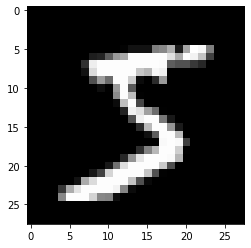

In [ ]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
y_train[0] # 정답 

5

#### 데이터 전처리 (Data Preprocessing)

In [ ]:
def flatten_for_mnist(x) :
  temp = np.zeros((x.shape[0], x[0].size))

  for index, data in enumerate(x) :
    temp[index, :] = data.flatten()  # 행의 인덱스가 index인 값  # flatten 1차원 배열화
    
  return temp

In [ ]:
x_train, x_test = x_train / 255.0,  x_test / 255.0 # Normalization RGB 255 bit

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train, depth = 10).numpy()
y_test_ohe = tf.one_hot(y_test, depth = 10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

1.5378700499807765e-05 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [ ]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [ ]:
def differential2D(f, X) :
  if X.ndim == 1 :
    return differential(f, X)

  grad = np.zeros_like(X)
  
  for idx, x in enumerate(X) :
    grad[idx] = differential(f, x)
  
  return grad

#### 2층 신경망으로 구현

In [ ]:
class MyModel() :

  def __init__(self) :
  

    def weight_init(input_nodes, hidden_nodes, output_units) :
       np.random.seed(777)

       params = {}
       params['w_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes) 
       params['b_1']  = np.zeros(hidden_nodes)
       params['w_2'] = 0.01 * np.random.randn(hidden_nodes, output_units) 
       params['b_2']  = np.zeros(output_units)
       return params

    self.params = weight_init(784, 64, 10) # 데이터 shape로 부터 가져옴

  def predict(self, x) :
    W1, W2 = self.params['w_1'], self.params['w_2']
    B1, B2    = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W2) + B2
    pred_y =  SoftMax(A2)

    return pred_y

  def loss(self, x, true_y) :
    pred_y = self.predict(x) 
    return CrossEntropyForBinary(pred_y, true_y)

  def GetGradient(self, x, t) :
    def loss_grad(grad) : 
      return self.loss(x, t)

    grads = {}
    grads['w_1'] = differential2D(loss_grad, self.params['w_1'])
    grads['b_1'] = differential2D(loss_grad, self.params['b_1'])
    grads['w_2'] = differential2D(loss_grad, self.params['w_2'])
    grads['b_2'] = differential2D(loss_grad, self.params['b_2'])

    return grads
    
  def accuracy(self, x, true_y) :
    pred_y = self.predict(x)
    y_argmax = np.argmax(pred_y, axis = 1)
    t_argmax = np.argmax(true_y,  axis = 1)

    accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])

    return accuracy


#### 모델 생성 및 학습
- 시간 많이 소요

In [ ]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()

iter_per_epoch = max(train_size / batch_size , 1)

start_time = time.time()

for i in tqdm(range(epochs)) :
  batch_index = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_index]
  y_batch = y_train_ohe[batch_index]

  grads = model.GetGradient(x_batch, y_batch)

  for key in grads.keys() :
    model.params[key] -= lr * grads[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  train_accuracy = model.accuracy(x_train, y_train_ohe)
  test_accuracy = model.accuracy(x_test, y_test_ohe)

  train_acc_list.append(train_accuracy)
  test_acc_list.append(test_accuracy) 

  print("Epoch : {}, Cost : {} Train Accuracy : {}, Test Accuracy : {}".format(i +1, loss, train_accuracy, test_accuracy))

end_time = time.time()

print("총 학습 시간 : {:.3f}s".format(end_time - start_time))

Epoch : 1, Cost : 465.9060502356192 Train Accuracy : 0.10441666666666667, Test Accuracy : 0.1028
Epoch : 2, Cost : 361.8440950235913 Train Accuracy : 0.09751666666666667, Test Accuracy : 0.0974

총 학습 시간 : 176.132s


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재